## 2.1 Machine Learning for Regression

In [13]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## 2.2 Data Preparation

In [16]:
df = pd.read_csv(r"C:\Users\pc\Downloads\data.csv")

df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [18]:
df.head(5) #take a look of the dataframe

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [22]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [21]:
# To access transmission line variable
df['Transmission Type']

0           MANUAL
1           MANUAL
2           MANUAL
3           MANUAL
4           MANUAL
           ...    
11909    AUTOMATIC
11910    AUTOMATIC
11911    AUTOMATIC
11912    AUTOMATIC
11913    AUTOMATIC
Name: Transmission Type, Length: 11914, dtype: object

In [29]:
# making all the columns uniform in terms of capitalisation and having no spaces in the columns
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [24]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [28]:
# to show the types of the columns
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [33]:
df.dtypes[df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [38]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [30]:
# cleaning make column
df['make'].str.lower().str.replace(' ', '_')

0            bmw
1            bmw
2            bmw
3            bmw
4            bmw
          ...   
11909      acura
11910      acura
11911      acura
11912      acura
11913    lincoln
Name: make, Length: 11914, dtype: object

In [39]:
# looping over all the columns to remove whitespaces and catipal
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [40]:
# to check first 5 rows of the cleaned data
df.head(5)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [41]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

## 2.3 Exploratory Data Analysis

In [42]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [46]:
# 
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

Distribution of Price

In [51]:
# Visualizing the price column by looking at its distribution
import matplotlib.pyplot as plt
import seaborn as sns

# assure that plots are displayed in jupyter notebook's cells
%matplotlib inline


<Axes: xlabel='msrp', ylabel='Count'>

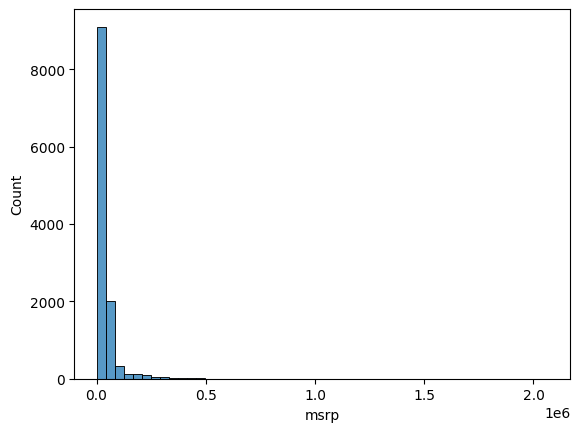

In [50]:
sns.histplot(df.msrp, bins=50) #show the histogram of a series


<Axes: xlabel='msrp', ylabel='Count'>

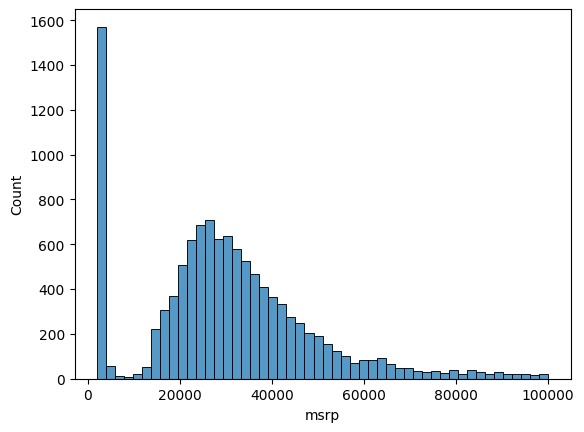

In [52]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)
# zoom in a bit to “ignore” the long tail with too less datapoints.

Numpy methods:

In [55]:
# we use logarithm method to get rid of the long tail
np.log1p([0, 1, 10, 1000, 100000])


array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [58]:
# now using the log for prices,
price_logs = np.log1p(df.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

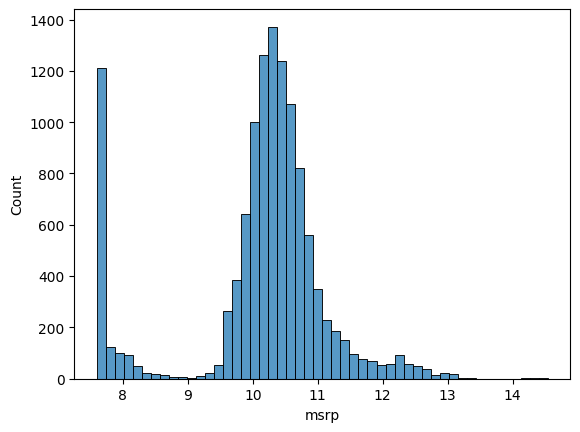

In [59]:
# plotting its histogram
sns.histplot(price_logs, bins=50)

Now the (long) tail is gone

## Missing Values

In [60]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## 2.4 Setting up the validation framework


Let's Draw it!

In [62]:
# Size of DataFrame
len(df)

11914

In [63]:
# 20% of DataFrame
len(df) * 0.2

2382.8

In [64]:
# 20% of DataFrame round to the nearest whole number with int
int(len(df) * 0.2)

2382

In [70]:
# Split dataframe into train, test, and validation
n = len(df) # length of the dataset

n_val = int(n * 0.2) # 20% of the dataset for validation
n_test = int(n * 0.2) # 20% of the dataset for testing
n_train = n - n_val - n_test # 60% of the dataset for training

In [66]:
n

11914

In [67]:
n_val, n_test, n_train


(2382, 2382, 7150)

In [71]:
df.iloc[[10, 0, 3, 5]]


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39600
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200


In [73]:
# Create the new dataframes # iloc command selects specific rows from a pandas DataFrame using their integer index positions.
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [75]:
# Shuffle the records in dataframe
idx = np.arange(n) # This line idx = np.arange(n) creates a NumPy array of integers from 0 to n-1.


In [85]:
np.random.seed(2) # set the random seed to make it reuseable
np.random.shuffle(idx)

In [79]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [80]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10343,gmc,terrain,2015,regular_unleaded,182.0,4.0,automatic,all_wheel_drive,4.0,crossover,compact,4dr_suv,29,20,549,34815
10835,mazda,truck,2002,regular_unleaded,147.0,6.0,manual,rear_wheel_drive,2.0,NaN,compact,regular_cab_pickup,21,17,586,15670
11091,chevrolet,uplander,2008,regular_unleaded,240.0,6.0,automatic,front_wheel_drive,4.0,flex_fuel,midsize,passenger_minivan,23,16,1385,24250
6083,volkswagen,jetta_sportwagen,2014,diesel,140.0,4.0,manual,front_wheel_drive,4.0,diesel,compact,wagon,42,30,873,29165
5468,volkswagen,golf,2017,regular_unleaded,170.0,4.0,manual,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,36,25,873,21595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7214,volkswagen,new_beetle,2010,regular_unleaded,150.0,5.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,28,20,873,27390
3247,cadillac,cts,2015,flex-fuel_(unleaded/e85),321.0,6.0,automatic,all_wheel_drive,4.0,"flex_fuel,luxury,performance",large,sedan,26,18,1624,63770
2562,honda,civic,2015,regular_unleaded,143.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,36,28,2202,18290
4489,ford,f-150,2015,flex-fuel_(unleaded/e85),282.0,6.0,automatic,rear_wheel_drive,2.0,flex_fuel,large,regular_cab_pickup,25,18,5657,31625


In [81]:
df_test

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
1432,nissan,armada,2014,regular_unleaded,317.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,4dr_suv,19,13,2009,37590
9983,chevrolet,ss,2016,premium_unleaded_(recommended),415.0,8.0,automatic,rear_wheel_drive,4.0,high-performance,large,sedan,20,14,1385,46575
2215,toyota,camry_solara,2006,regular_unleaded,225.0,6.0,automatic,front_wheel_drive,2.0,NaN,midsize,convertible,26,18,2031,30210
6105,volkswagen,jetta,2015,premium_unleaded_(recommended),210.0,4.0,automatic,front_wheel_drive,4.0,"factory_tuner,performance",midsize,sedan,32,24,873,30380
564,fiat,500,2017,premium_unleaded_(recommended),160.0,4.0,manual,front_wheel_drive,2.0,"hatchback,factory_tuner,performance",compact,2dr_hatchback,33,28,819,19995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,mercedes-benz,300-class,1993,regular_unleaded,194.0,6.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,23,17,617,2247
6591,infiniti,m35,2009,premium_unleaded_(recommended),275.0,6.0,automatic,all_wheel_drive,4.0,"luxury,performance",large,sedan,22,16,190,47950
11451,subaru,wrx,2015,premium_unleaded_(required),305.0,4.0,manual,all_wheel_drive,4.0,"factory_tuner,high-performance",compact,sedan,23,17,640,37395
2930,toyota,corolla,2015,regular_unleaded,132.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,37,28,2031,21495


In [82]:
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
11011,toyota,tundra,2016,flex-fuel_(unleaded/e85),381.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,17,13,2031,36030
7883,audi,q7,2015,premium_unleaded_(required),280.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury",large,4dr_suv,22,16,3105,48300
4452,ford,f-150_heritage,2004,regular_unleaded,202.0,6.0,manual,rear_wheel_drive,2.0,NaN,large,regular_cab_pickup,19,15,5657,20490
5233,lamborghini,gallardo,2014,premium_unleaded_(required),570.0,10.0,automated_manual,all_wheel_drive,2.0,"exotic,factory_tuner,high-performance",compact,coupe,20,13,1158,256300
1238,honda,accord,2016,regular_unleaded,185.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,37,27,2202,27380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10276,ford,taurus_x,2008,regular_unleaded,260.0,6.0,automatic,all_wheel_drive,4.0,crossover,large,wagon,22,15,5657,32600
1282,honda,accord,2017,regular_unleaded,185.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,36,27,2202,23155
2974,chevrolet,corvette,2015,premium_unleaded_(required),650.0,8.0,manual,rear_wheel_drive,2.0,"factory_tuner,high-performance",compact,coupe,22,15,1385,87650
10091,pontiac,sunfire,2005,regular_unleaded,140.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,32,23,210,15205


In [83]:
len(df_train), len(df_val), len(df_test)


(7150, 2382, 2382)

In [86]:
# Dropping the index column
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [88]:
# Get the target variables (y) # log trainsformation
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [89]:
# Remove the msrp from the dataframes
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [90]:
len(y_train)


7150

## 2.5 Linear regression


Draw

In [97]:
df_train.iloc[10]


make                                chevrolet
model                               avalanche
year                                     2011
engine_fuel_type     flex-fuel_(unleaded/e85)
engine_hp                               320.0
engine_cylinders                          8.0
transmission_type                   automatic
driven_wheels                rear_wheel_drive
number_of_doors                           4.0
market_category           crossover,flex_fuel
vehicle_size                            large
vehicle_style                 crew_cab_pickup
highway_mpg                                21
city_mpg                                   15
popularity                               1385
Name: 10, dtype: object

In [100]:
# Using engine_hp, city_mpg, popularity for feature matrix
xi = [320, 15, 1385]
xi

[320, 15, 1385]

In [101]:
xi = [320, 15, 1385]
w0 = 7.17 # bias term
w = [0.01, 0.04, 0.002]

In [93]:
def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred

In [103]:
linear_regression(xi)

13.74

In [108]:
# prediction for the car price in dollar
np.exp(13.74)

np.float64(927269.940399414)

In [105]:
np.expm1(13.74)

np.float64(927268.940399414)

In [106]:
np.log1p(927268.940399414)

np.float64(13.74)

## 2.6 Linear regression vector form

In [124]:
# Linear regression - vector form - dot product (Generalization)
def dot(xi, w):
    n = len(xi) # vector multiplication
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [112]:
# dot product implementation - shorter notation
def linear_regression(xi):
    return w0 + dot(xi, w)

In [113]:
w_new = [w0] + w


In [114]:
w_new


[7.17, 0.01, 0.04, 0.002]

In [115]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [116]:
linear_regression(xi)


13.74

In [117]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [118]:
xi

[320, 15, 1385]

In [120]:
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 320, 15, 1385]

X = [x1, x2, x10] # X is a list of list
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  320,   15, 1385]])

In [122]:
# multiplication between the vector and the matrix to get a new prediction 
X.dot(w_new)

array([12.38 , 13.552, 13.74 ])

In [123]:
# implementing linear regression
def linear_regression(X):
    return X.dot(w_new)

## 2.7 Training a linear regression model

In [125]:
def train_linear_regression(X, y):
    pass

In [177]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [320, 15, 1385],
    [158, 24, 185],
    [172, 25, 201],
    [413, 15, 1385],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 320,   15, 1385],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   15, 1385],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [178]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [179]:
X = np.column_stack([ones, X])


In [180]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]


In [181]:
# GRAM MATRIX
XTX = X.T.dot(X)

In [182]:
# Inverse GRAM MATRIX
XTX_inv = np.linalg.pinv(XTX)

In [183]:
def _raise_linalgerror_singular(err, flag):
    raise LinAlgError("Singular matrix")

In [184]:
w_full = XTX_inv.dot(X.T).dot(y)


In [185]:
XTX.dot(XTX_inv).round(1)

array([[ 1., -0., -0., -0.],
       [ 0.,  1., -0., -0.],
       [-0.,  0.,  1.,  0.],
       [-0.,  0.,  0.,  1.]])

In [186]:
w0 = w_full[0]
w = w_full[1:]

In [187]:
w0, w

(np.float64(22306.802754124834),
 array([-1.01223714e+01, -1.42930732e+02,  4.23556849e-02]))

In [188]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.pinv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [189]:
train_linear_regression(X, y)


(np.float64(11153.40137625971),
 array([ 1.11534014e+04, -1.01223714e+01, -1.42930732e+02,  4.23556851e-02]))

## 2.8 Car price baseline model


In [146]:
df_train.columns


Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [190]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [191]:
w0

np.float64(7.85736388320798)

In [192]:
w

array([ 9.53749595e-03, -1.41811792e-01,  1.53888210e-02,  1.44935230e-02,
       -7.59482108e-06])

<Axes: ylabel='Count'>

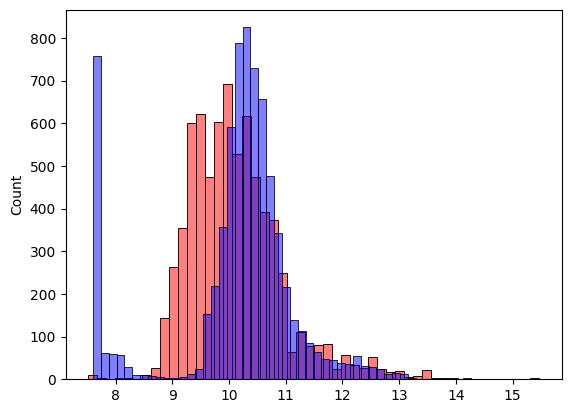

In [193]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

## 2.9 RMSE

In [194]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [195]:
rmse(y_train, y_pred)


np.float64(0.7569545013612794)

## 2.10 Validating the model


In [196]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [197]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.7550114636957735)

## 2.11 Simple feature engineering

In [198]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [199]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5132412935879148)

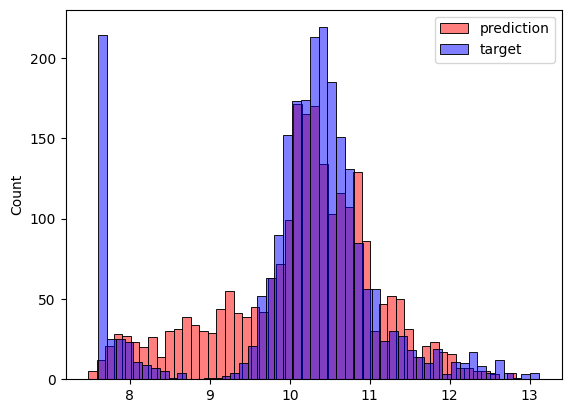

In [200]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

## 2.12 Categorical variables


In [201]:
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)

In [202]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']

    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' % v)

    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [203]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.4561168963029656)

In [206]:
w0, w

(np.float64(7.261366416829126),
 array([ 1.93691167e-03,  1.28632979e-01, -5.05390531e-03,  7.64068746e-03,
        -5.73730253e-05, -9.58525855e-02, -1.50671837e+00, -1.51745547e+00,
        -1.23530858e+00, -6.52963125e-02,  2.57999296e-01,  5.29402418e-02,
         3.57376481e-02, -1.16054124e-01, -1.87383921e-01, -6.26767673e-01,
        -3.19377482e-01, -3.24823596e-01, -2.98072116e-01, -6.80009838e-01,
        -1.20126328e-01, -5.32647615e-01, -7.26467515e-01, -3.08418417e-01,
         1.84466465e+00,  1.75500118e+00,  1.85065327e+00,  1.81104703e+00,
        -6.14247431e-02,  1.05568379e-01,  4.40103679e-03,  2.14338512e-02,
        -2.59476876e-02,  2.46129934e+00,  2.37359661e+00,  2.42647018e+00,
        -1.44493089e-01,  1.07934978e-02,  1.93374981e-01,  4.07416814e-01,
        -2.60020678e-01]))

## 2.13 Regularization

In [207]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.00000001],
]

X = np.array(X)
X

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000001]])

In [208]:
y= [1, 2, 3, 1, 2, 3]


In [209]:
XTX = X.T.dot(X)
XTX

array([[140.        , 111.        , 111.00000004],
       [111.        , 108.        , 108.00000005],
       [111.00000004, 108.00000005, 108.0000001 ]])

In [210]:
XTX_inv = np.linalg.inv(XTX)


In [211]:
XTX_inv

array([[ 3.86409478e-02, -1.26839821e+05,  1.26839770e+05],
       [-1.26839767e+05,  2.88638033e+14, -2.88638033e+14],
       [ 1.26839727e+05, -2.88638033e+14,  2.88638033e+14]])

In [212]:
XTX_inv.dot(X.T).dot(y)


array([-1.93908875e-01, -3.61854375e+06,  3.61854643e+06])

In [213]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]

XTX = np.array(XTX)

In [214]:
np.linalg.inv(XTX)


array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

In [215]:
XTX = XTX + 0.01 * np.eye(3)


In [216]:
np.linalg.inv(XTX)

array([[ -0.33668908,   0.33501399,   0.33501399],
       [  0.33501399,  49.91590897, -50.08509104],
       [  0.33501399, -50.08509104,  49.91590897]])

In [217]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [218]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.45607829294687857)

## 2.14 Tuning the model

In [219]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 -5.328348507739551e+17 12381.998468938556
1e-05 7.291213128343157 0.4561168159680012
0.0001 7.255329975302603 0.4561165038091409
0.001 7.258738471866993 0.4561128586355441
0.1 7.0174474459380125 0.45587559123542515
1 6.007464141771081 0.4573193877374692
10 4.6587259181230785 0.4680538735345072


In [220]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

np.float64(0.4561128586355441)

## 2.15 Using the model

In [221]:
df_full_train = pd.concat([df_train, df_val])


In [222]:
df_full_train = df_full_train.reset_index(drop=True)


In [223]:
X_full_train = prepare_X(df_full_train)


In [224]:
X_full_train


array([[182.,   4.,  29., ...,   0.,   0.,   0.],
       [147.,   6.,  21., ...,   0.,   0.,   0.],
       [240.,   6.,  23., ...,   0.,   0.,   0.],
       ...,
       [650.,   8.,  22., ...,   1.,   0.,   0.],
       [140.,   4.,  32., ...,   1.,   0.,   0.],
       [138.,   4.,  33., ...,   0.,   0.,   0.]])

In [225]:
y_full_train = np.concatenate([y_train, y_val])


In [226]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)


In [227]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

np.float64(0.4672028057723737)

In [228]:
car = df_test.iloc[20].to_dict()
car

{'make': 'infiniti',
 'model': 'q50',
 'year': 2016,
 'engine_fuel_type': 'premium_unleaded_(required)',
 'engine_hp': 208.0,
 'engine_cylinders': 4.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'rear_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'luxury',
 'vehicle_size': 'midsize',
 'vehicle_style': 'sedan',
 'highway_mpg': 31,
 'city_mpg': 23,
 'popularity': 190}

In [229]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,infiniti,q50,2016,premium_unleaded_(required),208.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,31,23,190


In [230]:
X_small = prepare_X(df_small)


In [231]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

np.float64(10.72627267609623)

In [232]:
np.expm1(y_pred)


np.float64(45535.64548678498)

In [233]:
np.expm1(y_test[20])


np.float64(37650.00000000003)